In [1]:
import warnings
import pandas as pd
import numpy as np
import os
import sys # error msg, add the modules
import operator # sorting
from math import *

sys.path.append('../')

import read_trace
import cuda_timeline
from avgblkmodel import *
#from model_cke import *

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# gpu info

In [2]:
gtx950 = DeviceInfo()
gtx950.sm_num = 6
gtx950.sharedmem_per_sm = 49152
gtx950.reg_per_sm = 65536
gtx950.maxthreads_per_sm = 2048

# 2 stream info

In [3]:
# 10M for mem_mem : where the h2d between streams are overlapped
trace_file = 'trace_10M_s1.csv'
trace_file_2cke = 'trace_h2d_h2d_ovlp.csv'


df_trace = read_trace.trace2dataframe(trace_file) # read the trace to the dataframe
df_trace_2cke = read_trace.trace2dataframe(trace_file_2cke)

In [4]:
df_trace

,Start,Duration,Grid X,Grid Y,Grid Z,Block X,Block Y,Block Z,Registers Per Thread,Static SMem,Dynamic SMem,Size,Throughput,Device,Context,Stream,Name
0,ms,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,MB,GB/s,NaN,NaN,NaN,NaN
1,610.840271,6.436815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,5.787475,GeForce GTX 950 (0),1.0,13.0,[CUDA memcpy HtoD]
2,617.278302,6.429999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,5.793609,GeForce GTX 950 (0),1.0,13.0,[CUDA memcpy HtoD]
3,623.719789,1.276618,39063.0,1.0,1.0,256.0,1.0,1.0,8.0,0,0,NaN,NaN,GeForce GTX 950 (0),1.0,13.0,"kernel_vectorAdd(float const *, float const *,..."
4,625.003191,6.269646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,5.941787,GeForce GTX 950 (0),1.0,13.0,[CUDA memcpy DtoH]


/home/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1292: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1297: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


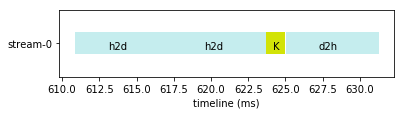

In [5]:
cuda_timeline.plot_trace(df_trace)

In [6]:
df_trace_2cke

,Start,Duration,Grid X,Grid Y,Grid Z,Block X,Block Y,Block Z,Registers Per Thread,Static SMem,Dynamic SMem,Size,Throughput,Device,Context,Stream,Name
0,ms,ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,MB,GB/s,NaN,NaN,NaN,NaN
1,665.032627,10.783099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,3.454749,GeForce GTX 950 (0),1.0,13.0,[CUDA memcpy HtoD]
2,668.190628,12.898855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,2.888078,GeForce GTX 950 (0),1.0,14.0,[CUDA memcpy HtoD]
3,675.816942,12.913127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,2.884886,GeForce GTX 950 (0),1.0,13.0,[CUDA memcpy HtoD]
4,681.090667,10.213144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,3.647545,GeForce GTX 950 (0),1.0,14.0,[CUDA memcpy HtoD]
5,688.741397,1.377896,39063.0,1.0,1.0,256.0,1.0,1.0,8.0,0,0,NaN,NaN,GeForce GTX 950 (0),1.0,13.0,"kernel_vectorAdd(float const *, float const *,..."
6,690.126461,10.658490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,3.495139,GeForce GTX 950 (0),1.0,13.0,[CUDA memcpy DtoH]
7,691.316867,1.366120,39063.0,1.0,1.0,256.0,1.0,1.0,8.0,0,0,NaN,NaN,GeForce GTX 950 (0),1.0,14.0,"kernel_vectorAdd(float const *, float const *,..."
8,693.294222,9.522868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.146973,3.911942,GeForce GTX 950 (0),1.0,14.0,[CUDA memcpy DtoH]


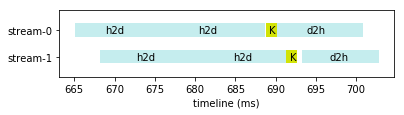

In [7]:
cuda_timeline.plot_trace(df_trace_2cke)

# 1cke - read trace and reset the timeline

In [8]:
df_single_stream = read_trace.get_timing(df_trace)

In [10]:
df_single_stream

,api_type,start,end,duration
0,h2d,610.840271,617.277086,6.436815
1,h2d,617.278302,623.708301,6.429999
2,kern,623.719789,624.996407,1.276618
3,d2h,625.003191,631.272837,6.269646


In [9]:
df_s1 = reset_starting(df_single_stream)

NameError: name 'model_param_from_trace_v1' is not defined

# 2cke

In [ ]:
stream_num = 2

df_cke_list = []
for x in range(stream_num):
    df_cke_list.append(df_s1.copy(deep=True))

In [ ]:
# extract kernel info
streaminfo = get_stream_info(df_trace)
current_kern_info = streaminfo[0].kernel_info[0]

grid_dim = float(current_kern_info.grid_x) * float(current_kern_info.grid_y) * float(current_kern_info.grid_z)
block_dim = float(current_kern_info.blk_x) * float(current_kern_info.blk_y) * float(current_kern_info.blk_z)
reg_per_thread = float(current_kern_info.regs_per_thread)
sm_per_blk = float(current_kern_info.sm_per_block)
    
# kernel runtime in ms
current_kern =  streaminfo[0].kernel[0]
kern_runtime_ms = float(current_kern.end_time_ms) - float(current_kern.start_time_ms)

kernel = KernelInfo()
kernel.blockDim = block_dim
kernel.gridDim = grid_dim
kernel.reg_per_thread = reg_per_thread
kernel.sharedmem_per_blk = sm_per_blk
kernel.runtime_ms = kern_runtime_ms

kernel.avg_blk_time = compute_avgblktime(gtx950, kernel)
#print kernel_avg_blk_time

### running 2cke case

In [ ]:
H2D_H2D_OVLP_TH = 3.158431

for i in range(1,stream_num):
    # compute the time for the init data transfer
    stream_startTime = find_whentostart_comingStream(df_cke_list[i-1], H2D_H2D_OVLP_TH)
    print('stream_startTime : {}'.format(stream_startTime))
    df_cke_list[i].start += stream_startTime
    df_cke_list[i].end   += stream_startTime

### check whether there is h2d overlapping

In [ ]:
prev_stm_h2ds_start, prev_stm_h2ds_end = find_h2ds_timing(df_cke_list[0])
print("prev stream h2ds : {} - {}".format(prev_stm_h2ds_start, prev_stm_h2ds_end))

curr_stm_h2ds_start, curr_stm_h2ds_end = find_h2ds_timing(df_cke_list[1])
print("curr stream h2ds : {} - {}".format(curr_stm_h2ds_start, curr_stm_h2ds_end))

In [ ]:
if curr_stm_h2ds_start >=prev_stm_h2ds_start and curr_stm_h2ds_start < prev_stm_h2ds_end:
    h2ds_ovlp_between_stream = True 
else:
    h2ds_ovlp_between_stream = False

print("h2ds_ovlp_between_stream : {}".format(h2ds_ovlp_between_stream))

### check kernel overlapping

In [ ]:
prev_stm_kern_start, prev_stm_kern_end = find_kern_timing(df_cke_list[0])
print("prev stream kern : {} - {}".format(prev_stm_kern_start, prev_stm_kern_end))

curr_stm_kern_start, curr_stm_kern_end = find_kern_timing(df_cke_list[1])
print("curr stream kern : {} - {}".format(curr_stm_kern_start, curr_stm_kern_end))


In [ ]:
if  prev_stm_kern_start <= curr_stm_kern_start < prev_stm_kern_end:
    kern_ovlp_between_stream = True 
else:
    kern_ovlp_between_stream = False

print("kern_ovlp_between_stream : {}".format(kern_ovlp_between_stream))

#### use cke model if kern_ovlp_between_stream is true

In [ ]:
# get the overlapping kernel info from both stream

# since the ovlp kernels are identical, we duplicate twice
kernel_num = 2
kernels = [kernel for i in range(kernel_num)]

pred_cke_time, kernels_start_end = model_cke_from_same_kernel(gtx950, kernels)

In [ ]:
pred_cke_time

In [ ]:
kernels_start_end

In [ ]:
df_cke_list[0]

In [ ]:
df_cke_list[1]

In [ ]:
def api_order(df_trace):
    order_ls = []
    for index,row in df_trace.iterrows():
        order_ls.append([str(row.api_type), index])
    return order_ls

In [ ]:
cke1_api_list = api_order(df_cke_list[1])
print cke1_api_list

In [ ]:
def find_api_pos(ls, api_name, order):
    count = 0
    index = 0
    found = 0
    for api in ls:
        if api[0] == api_name:
            count = count + 1
            if count == order:
                found = 1
                index = api[1]
                break;
    return found, index

In [ ]:
# found, pos = find_api_pos(cke1_api_list, "kern", 1)
# print("found : {}, pos : {}".format(found, pos))

In [ ]:
# adjust kernel timing 

df_current = df_cke_list[1]
df_current_kern = df_current.loc[df_current.api_type == "kern"]
#print df_current_kern.start
#print df_current_kern.end

df_prev = df_cke_list[0]
df_prev_kern = df_prev.loc[df_prev.api_type == "kern"]
#print df_prev_kern.start

kern_start_update =  float(df_prev_kern.start) + kernels_start_end[1][0]
print kern_start_update

kern_end_update = float(df_prev_kern.start) + kernels_start_end[1][1]
print kern_end_update

# we need to adjust the timing for the following api calls too
# find out the kern_d2h ovhd
df_current_d2h = df_current.loc[df_current.api_type == "d2h"]
#print df_current_d2h.start
#print df_current_kern.end

kern_d2h_ovhd = float(df_current_d2h.start) - float(df_current_kern.end)
print kern_d2h_ovhd


d2h_new_start = kern_end_update + kern_d2h_ovhd
print d2h_new_start

d2h_delta = d2h_new_start - float(df_current_d2h.start)
print d2h_delta

### update
found, pos = find_api_pos(cke1_api_list, "kern", 1)  # find the 1st kern in the api list
print("found : {}, pos : {}".format(found, pos))

df_current.set_value(pos, 'start', kern_start_update)
df_current.set_value(pos, 'end', kern_end_update)
df_current.set_value(pos, 'duration', kern_end_update - kern_start_update)
#df_current_kern.start = kern_start_update 
#df_current_kern.end = kern_end_update
#df_current_kern.duration = kern_end_update - kern_start_update


found, pos = find_api_pos(cke1_api_list, "d2h", 1)  # find the 1st kern in the api list
print("found : {}, pos : {}".format(found, pos))

df_current.set_value(pos, 'start', d2h_new_start)
df_current.set_value(pos, 'end', df_current_d2h.end + d2h_delta)
#df_current_d2h.start = d2h_new_start
#df_current_d2h.end = df_current_d2h.end + d2h_delta

In [ ]:
df_cke_list[0]

In [ ]:
df_cke_list[1]

### check whether d2h overlap

In [ ]:
prev_stm_d2h_start, prev_stm_d2h_end = find_d2h_timing(df_cke_list[0])
print("prev stream d2h : {} - {}".format(prev_stm_d2h_start, prev_stm_d2h_end))

curr_stm_d2h_start, curr_stm_d2h_end = find_d2h_timing(df_cke_list[1])
print("curr stream d2h : {} - {}".format(curr_stm_d2h_start, curr_stm_d2h_end))

In [ ]:
if  prev_stm_d2h_start <= curr_stm_d2h_start < prev_stm_d2h_end:
    d2h_ovlp_between_stream = True 
else:
    d2h_ovlp_between_stream = False

print("d2h_ovlp_between_stream : {}".format(d2h_ovlp_between_stream))